In [1]:
#!pip install bnltk

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import codecs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from bnltk.tokenize import Tokenizers
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay,make_scorer,roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import sklearn.metrics as metrics
import collections
import nltk
import string


In [18]:
from google.colab import files
uploaded = files.upload()

Saving ecommerce_dataset.txt to ecommerce_dataset (2).txt


In [19]:
from google.colab import files
uploaded = files.upload()

Saving stopwords.txt to stopwords (2).txt


In [29]:
data = '/content/ecommerce_dataset.txt'
stop_word= '/content/stopwords.txt'

In [30]:
collection = collections.Counter()
token = Tokenizers()
max_len = 0
xs,ys =[],[]

In [31]:
stop_wrd = codecs.open(stop_word, "r", encoding='utf-8').read().split()


In [32]:
pun = set(string.punctuation)
pun

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~'}

In [33]:
from os import remove
fin = codecs.open(data, "r", encoding='utf-16')
for line in fin:
    _, sent = line.strip().split("\t")  # Stripping the dataset based on tab. That is stripping label from sentence
    print("Label: ", _)
    print("Sentence: ", sent)
    word = token.bn_word_tokenizer(sent)
    print("Word: ", word)
    remove_pun = [words for words in clean_word if words not in pun]
    print("Remove Pun: ", remove_pun)
    clean_word= [words for words in word if words not in remove_pun]
    print("Clean Word: ", clean_word)

    if len(remove_pun) > max_len:
        max_len = len(remove_pun)
     # Update word frequency counter
    for word in clean_word:
        collection[word] += 1

        xs.append(" ".join(remove_pun))
        ys.append(int(_))

fin.close()





Label:  0
Sentence:  অনেকগুলা অরডার আছে একটু দেখবেন
Word:  ['অনেকগুলা', 'অরডার', 'আছে', 'একটু', 'দেখবেন']
Remove Pun:  ['কিছুই', 'ফ্রেশ', 'না']
Clean Word:  ['অনেকগুলা', 'অরডার', 'আছে', 'একটু', 'দেখবেন']
Label:  1
Sentence:  ভালোবাসা রইল ইভ্যালির প্রতি
Word:  ['ভালোবাসা', 'রইল', 'ইভ্যালির', 'প্রতি']
Remove Pun:  ['অনেকগুলা', 'অরডার', 'আছে', 'একটু', 'দেখবেন']
Clean Word:  ['ভালোবাসা', 'রইল', 'ইভ্যালির', 'প্রতি']
Label:  0
Sentence:  আগের প্রডাক্ট ক্লিয়ার করেন তারাতাড়ি
Word:  ['আগের', 'প্রডাক্ট', 'ক্লিয়ার', 'করেন', 'তারাতাড়ি']
Remove Pun:  ['ভালোবাসা', 'রইল', 'ইভ্যালির', 'প্রতি']
Clean Word:  ['আগের', 'প্রডাক্ট', 'ক্লিয়ার', 'করেন', 'তারাতাড়ি']
Label:  0
Sentence:  আর ভাল লাগতেছে না
Word:  ['আর', 'ভাল', 'লাগতেছে', 'না']
Remove Pun:  ['আগের', 'প্রডাক্ট', 'ক্লিয়ার', 'করেন', 'তারাতাড়ি']
Clean Word:  ['আর', 'ভাল', 'লাগতেছে', 'না']
Label:  0
Sentence:  দয়া করে একটু বলেন ভাই কবে পাবো
Word:  ['দয়া', 'করে', 'একটু', 'বলেন', 'ভাই', 'কবে', 'পাবো']
Remove Pun:  ['আর', 'ভাল', 'লাগতেছে', 'না']
Clean Wo

In [34]:
max_len

64

In [35]:
xtrain,xtest,ytrain,ytest = train_test_split(xs,ys,test_size=0.2,random_state=42)

In [36]:
#vector
vector = TfidfVectorizer(ngram_range=(1, 3), use_idf=True, tokenizer=lambda x: x.split())
x_train = vector.fit_transform(xtrain)
x_test = vector.transform(xtest)


/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [38]:
lr = LogisticRegression()
lr.fit(x_train,ytrain)

LogisticRegression()

In [39]:
lr.score(x_train,ytrain)

0.9908419023136247

In [40]:
lr.score(x_test,ytest)

0.9820051413881749

In [41]:
# prediction
y_pred = lr.predict(x_test)

In [42]:
# print confusion matrix
print(confusion_matrix(ytest,y_pred))

[[1445   26]
 [  30 1611]]


In [43]:
# classification report
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1471
           1       0.98      0.98      0.98      1641

    accuracy                           0.98      3112
   macro avg       0.98      0.98      0.98      3112
weighted avg       0.98      0.98      0.98      3112



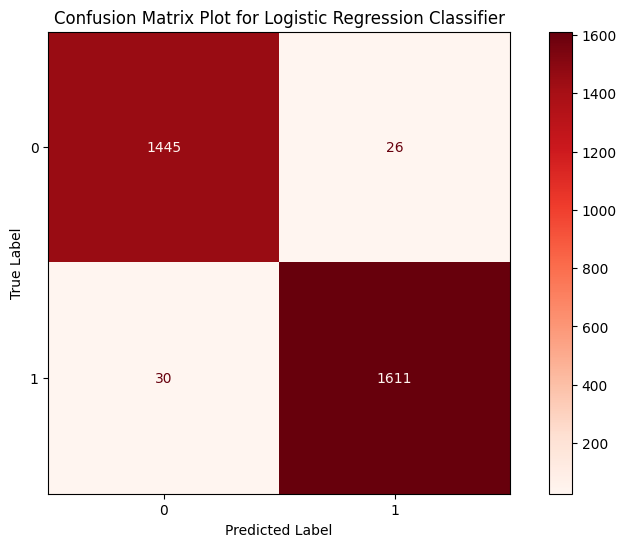

In [47]:
# see with display figure
cm = confusion_matrix(ytest, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot(cmap=plt.cm.Reds)
disp.ax_.set_title('Confusion Matrix Plot for Logistic Regression Classifier', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10, 6)


# Show the plot
plt.show()
